In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.feature_selection import r_regression
from sklearn.naive_bayes import CategoricalNB
from sklearn import tree
from sklearn import svm

In [ ]:
# Leitura e pré-processamento da base de dados
atributos = ["IR","MR","FF","CR","CO","OP","Class"]
url = "https://raw.githubusercontent.com/GabrielFCosta/preprocessamento/main/Qualitative_Bankruptcy.data.txt"
dados = pd.read_csv(url, names = atributos)
print(dados)

for atrib in atributos[:6]:
  dados.loc[ dados[atrib] == 'P', atrib] = 2
  dados.loc[ dados[atrib] == 'A', atrib] = 1
  dados.loc[ dados[atrib] == 'N', atrib] = 0

le = LabelEncoder()
dados["Class"] = le.fit_transform(dados["Class"])
print(dados)

    IR MR FF CR CO OP Class
0    P  P  A  A  A  P    NB
1    N  N  A  A  A  N    NB
2    A  A  A  A  A  A    NB
3    P  P  P  P  P  P    NB
4    N  N  P  P  P  N    NB
..  .. .. .. .. .. ..   ...
245  N  N  A  N  N  N     B
246  P  N  N  N  N  N     B
247  A  N  N  N  N  N     B
248  N  N  N  N  N  N     B
249  P  N  N  N  A  A     B

[250 rows x 7 columns]
    IR MR FF CR CO OP  Class
0    2  2  1  1  1  2      1
1    0  0  1  1  1  0      1
2    1  1  1  1  1  1      1
3    2  2  2  2  2  2      1
4    0  0  2  2  2  0      1
..  .. .. .. .. .. ..    ...
245  0  0  1  0  0  0      0
246  2  0  0  0  0  0      0
247  1  0  0  0  0  0      0
248  0  0  0  0  0  0      0
249  2  0  0  0  1  1      0

[250 rows x 7 columns]


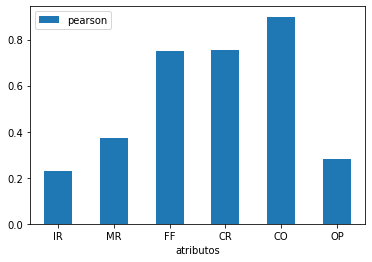

[0.22782266 0.37083809 0.75101955 0.75590886 0.89945177 0.27978626]
    IR MR FF CR CO OP
0    2  2  1  1  1  2
1    0  0  1  1  1  0
2    1  1  1  1  1  1
3    2  2  2  2  2  2
4    0  0  2  2  2  0
..  .. .. .. .. .. ..
245  0  0  1  0  0  0
246  2  0  0  0  0  0
247  1  0  0  0  0  0
248  0  0  0  0  0  0
249  2  0  0  0  1  1

[250 rows x 6 columns]
    FF CR CO
0    1  1  1
1    1  1  1
2    1  1  1
3    2  2  2
4    2  2  2
..  .. .. ..
245  1  0  0
246  0  0  0
247  0  0  0
248  0  0  0
249  0  0  1

[250 rows x 3 columns]


In [ ]:
# Seleção de características com base no coeficiente de Pearson:
treino = dados.drop(["Class"],axis=1)
classes = dados["Class"]
pearson = r_regression(treino,classes)
aux = pd.DataFrame(list(zip(atributos[:6],pearson)),columns =['atributos', 'pearson'])
aux.plot.bar(x="atributos",rot=0)
plt.show()
print(pearson)

# Conjunto de dados de teste (20%) e treino contendo todos os 6 atributos:
print(treino)
x_train0, x_test0, y_train0, y_test0 = train_test_split(treino,classes,test_size=0.2,random_state=0)

# Conjunto de dados de teste (20%) e treino excluindo atributos com coeficientes abaixo de 0.7:
excl = []
index = 0
for coef in pearson:
  if coef < 0.7:
    excl.append(atributos[index])
  index += 1
excl.append("Class")
treino = dados.drop(excl,axis=1)
print(treino)
x_train, x_test, y_train, y_test = train_test_split(treino,classes,test_size=0.2,random_state=0)

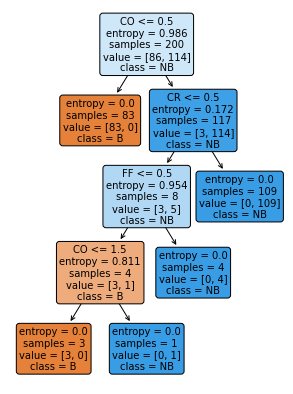

<Figure size 720x720 with 0 Axes>

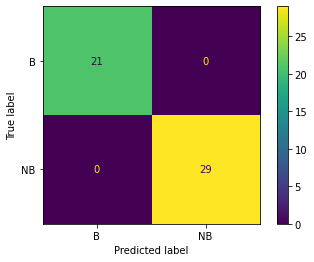

<Figure size 720x720 with 0 Axes>

Acurácia: 1.0
Precisão: 1.0


In [ ]:
# Classificador Árvore de Decisão com seleção de atributos
clf = tree.DecisionTreeClassifier(criterion="entropy").fit(x_train,y_train)
fig = plt.figure(figsize=(5,7))
tree.plot_tree(clf, feature_names = ["FF","CR","CO"],
               class_names=["B","NB"],
               filled=True, rounded=True,fontsize=10)
plt.show()
#dot_dados = tree.export_graphviz(clf, feature_names = ["Financial Flexibility",
#                                                       "Credibility",
#                                                       "Competitiveness"],
#                                 class_names=["Bankruptcy","Non-Bankruptcy"],
#                                 filled=True, rounded=True,
#                                 special_characters=True)
#graph = graphviz.Source(dot_dados)
#graph.render("arvore",format="png")
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["B","NB"])
disp.plot()
plt.show(plt.figure(figsize=(10,10)))
print("Acurácia: "+ str(accuracy_score(y_test, y_pred)))
print("Precisão: "+ str(precision_score(y_test, y_pred)))

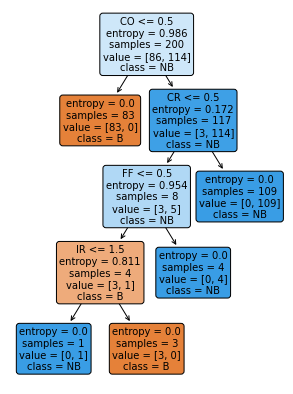

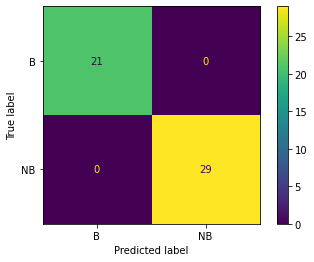

Acurácia: 1.0
Precisão: 1.0


In [ ]:
# Classificador Árvore de Decisão utilizando todos os atributos
clf = tree.DecisionTreeClassifier(criterion="entropy").fit(x_train0,y_train0)
fig = plt.figure(figsize=(5,7))
tree.plot_tree(clf, feature_names = atributos[:6],class_names=["B","NB"],
               filled=True, rounded=True,fontsize=10)
plt.show()

y_pred = clf.predict(x_test0)
cm = confusion_matrix(y_test0,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["B","NB"])
disp.plot()
plt.show()
print("Acurácia: "+ str(accuracy_score(y_test0, y_pred)))
print("Precisão: "+ str(precision_score(y_test0, y_pred)))

In [ ]:
# SVM com seleção de atributos...
clf = svm.SVC(kernel="linear").fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# ...e utilizando todos os atributos
clf = svm.SVC(kernel="linear").fit(x_train0, y_train0)
y_pred = clf.predict(x_test0)
print(confusion_matrix(y_test0, y_pred))

[[21  0]
 [ 0 29]]
[[21  0]
 [ 0 29]]


In [ ]:
# Naive Bayes com seleção de atributos...
clf = CategoricalNB().fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))

# ...e utilizando todos os atributos
clf = CategoricalNB().fit(x_train0, y_train0)
y_pred = clf.predict(x_test0)
print(confusion_matrix(y_test0, y_pred))

[[21  0]
 [ 0 29]]
[[21  0]
 [ 0 29]]
